# TFLite on Python
## Import modules


In [1]:
import tensorflow as tf
import cv2
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

/Users/osamura/.local/share/virtualenvs/GoogleMVFaceDetectorResources-ualQ251a/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/osamura/.local/share/virtualenvs/GoogleMVFaceDetectorResources-ualQ251a/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/osamura/.local/share/virtualenvs/GoogleMVFaceDetectorResources-ualQ251a/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be unders

In [2]:
interpreter = tf.lite.Interpreter("./contours.tfl")
interpreter.allocate_tensors()
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()
input_details

[{'name': 'input_1',
  'index': 0,
  'shape': array([  1, 192, 192,   3], dtype=int32),
  'dtype': numpy.float32,
  'quantization': (0.0, 0)}]

In [3]:
output_details

[{'name': 'conv2d_27',
  'index': 213,
  'shape': array([  1,   1,   1, 266], dtype=int32),
  'dtype': numpy.float32,
  'quantization': (0.0, 0)},
 {'name': 'conv2d_31',
  'index': 210,
  'shape': array([1, 1, 1, 1], dtype=int32),
  'dtype': numpy.float32,
  'quantization': (0.0, 0)}]

(192, 192, 3)

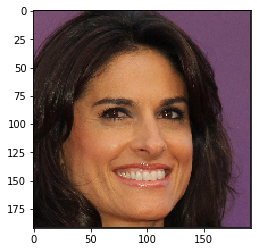

In [4]:
img = cv2.imread("image.png")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
size = 192
img = cv2.resize(img, (size, size))
plt.imshow(img)
# red, green, blue = input_img.split()
img = img.astype(np.float32)
img = img / 256.0
img.shape


In [5]:
input_img = img[np.newaxis, :, :, :]
input_img.shape

(1, 192, 192, 3)

In [6]:
interpreter.set_tensor(input_details[0]['index'], input_img)
interpreter.invoke()
pre_landmark = interpreter.get_tensor(output_details[0]['index'])
print(pre_landmark)

[[[[ 99.23948   49.690353 107.746605  50.24605  121.98517   52.98
    130.29031   57.621452 135.2813    65.00595  138.23091   73.088425
    139.50996   81.869415 139.7279    93.46116  141.28307  104.71365
    141.95409  115.80426  140.4959   127.82239  135.86697  139.95364
    131.22304  149.10114  127.16076  155.90694  122.59507  162.5056
    118.7856   167.12532  114.32493  171.11133  107.27529  174.40033
    101.021065 175.76733   93.85254  175.4802    83.87643  173.41743
     75.442535 170.2141    66.83304  166.12938   57.22127  159.67555
     48.073425 153.06958   39.606693 142.1992    34.64065  129.96971
     32.177887 117.87334   30.999868 106.289444  30.881304  94.77621
     32.736366  83.47768   37.06197   73.523285  46.494457  64.47986
     56.76      56.75602   70.815414  52.197083  89.39596   49.95627
     50.148003  81.62668   57.46826   77.613014  67.32966   75.5565
     78.83966   76.26357   90.53895   77.44229   54.420784  84.127205
     60.91252   80.970436  69.37764  

In [7]:
pre_landmark.shape

(1, 1, 1, 266)

In [8]:
pre_landmark = np.squeeze(pre_landmark)
pre_landmark.shape

(266,)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


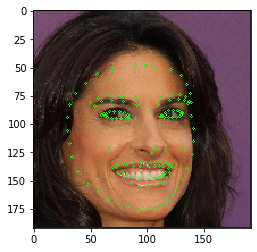

In [9]:
pre_landmark = pre_landmark.reshape(-1, 2)
for (x, y) in pre_landmark.astype(np.int32):
    cv2.circle(img, (x, y), 1, (0, 255, 0))
plt.imshow(img)